In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [6]:
df = pd.read_csv('credit_risk_dataset')

FileNotFoundError: [Errno 2] No such file or directory: 'credit_risk_dataset'

In [5]:
import os
print(os.getcwd())

d:\Project\Credit risk dataset


In [7]:
df = pd.read_csv('credit_risk_dataset.csv')

In [8]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,HOMEIMPROVEMENT,C,35000,14.27,1,0.55,Y,4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [11]:
df["person_emp_length"].fillna(df["person_emp_length"].median(),inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_15796\3566052475.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["person_emp_length"].fillna(df["person_emp_length"].median(),inplace=True)


In [12]:
df["loan_int_rate"].fillna(df["loan_int_rate"].median(),inplace=True)

C:\Users\suraj\AppData\Local\Temp\ipykernel_15796\1067124480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["loan_int_rate"].fillna(df["loan_int_rate"].median(),inplace=True)


In [13]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [14]:
df["loan_status"].value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [15]:
cat_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [16]:
num_cols = ['person_age', 'person_income', 'person_emp_length', 
            'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [17]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Model initialize
rf_model = RandomForestClassifier(random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

In [19]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# Classification report
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_score)

[[5065   30]
 [ 413 1009]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5095
           1       0.97      0.71      0.82      1422

    accuracy                           0.93      6517
   macro avg       0.95      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517

ROC-AUC Score: 0.928614344335267


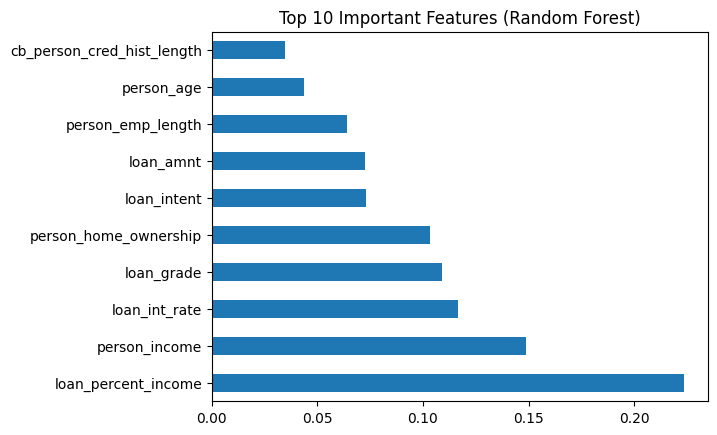

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Random Forest)")
plt.show()


In [21]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

[[5052   43]
 [ 380 1042]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5095
           1       0.96      0.73      0.83      1422

    accuracy                           0.94      6517
   macro avg       0.95      0.86      0.90      6517
weighted avg       0.94      0.94      0.93      6517

ROC-AUC Score: 0.9498688077028719


c:\Users\suraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:53:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:
# Test data ya original data
probs = xgb_model.predict_proba(X_test)[:, 1]  # Probability of default (class 1)

In [28]:
result_df = X_test.copy()
result_df['default_probability'] = probs
result_df['risk_assessment'] = result_df['default_probability'].apply(lambda x: 'High Risk' if x > 0.5 else 'Low Risk')
result_df['business_decision'] = result_df['default_probability'].apply(lambda x: 'Reject' if x > 0.5 else 'Approve')

# Index ko "customer_id" bol do
result_df.reset_index(inplace=True)
result_df.rename(columns={'index': 'customer_id'}, inplace=True)

print(result_df[['customer_id', 'default_probability', 'risk_assessment', 'business_decision']].head())


   customer_id  default_probability risk_assessment business_decision
0         6616             0.019005        Low Risk           Approve
1        21802             0.014351        Low Risk           Approve
2        31886             0.008036        Low Risk           Approve
3        17799             0.022085        Low Risk           Approve
4         5207             0.005589        Low Risk           Approve
